# 1 绪论
# 1.1  例子:多项式曲线拟合
以简单的回归问题开始, 介绍很多关键概念.

## 1.1.1 数据的生成:
数据 以 $ y = \sin(2 \pi x) $ 产生, 带有随机噪声.

## 1.1.2 使用简单的多项式函数来拟合曲线
我们的目标是 使用训练数据集, 拟合出数据的生成模型, 该模型对新的数据x 预测结果y, 这实际上就是在隐式的发现内在函数
$$ y = \sin(2\pi x) $$
这是一个困难问题, 因为我们必须从有限的数据中, 观察到噪声, 理解到 预测y 是具有不确定性的.

**概率论 提供了一个模型框架, 用精准的数学形式,来描述这种不确定性.**
**决策论 让我们根据合适的标准, 利用概率的形式, 选择最佳模型进行预测**

现在我们使用简单的多项式来拟合数据
$$ y(x, w) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M = \sum\limits_{j=0}^M w_jx^j $$
M 是多项式的阶, 多项式的复杂度实际上就是通过多项式的阶进行控制的, 阶越高则复杂度越高, 越具有拟合能力.
$y(x, w)$ 是x的非线性函数, 但是对于假设参数 HyperParamter W, 则是一个线性函数, **对于这样假设参数是线性函数的模型 叫做线性模型.**

### 1 如何确定多项式的参数?  

通过最小化误差函数来确定假设参数W, **误差函数 衡量给定 假设参数W 情况下, 预测函数y(x, W) 与 真实值 之间的差别**   
最简单, 应用广泛的误差函数是 均方误差
$$ E(\omega) = \frac{1}{2}\sum\limits_{n=1}^N\big\{y(x_n|\omega) - t_n\big\}^2 $$
误差函数达到最小的 $\omega$ 就是 假设参数, 因为误差函数是 假设参数的 二次函数, 直接求导等于0 就可求解.  
**我们的目的实际上是利用$y(x, \omega) $来拟合数据, 实际上就是在描述数据的生成函数 $\sin(2\pi x)$, 因此对于描述生成函数的好坏,不能简单的利用训练数据来判断, 还需要考虑其他由生成函数产生的数据, 因此考量一个假设模型的结果需要一个测试集合**

### 2 模型复杂度

模型复杂度越高, 表达能力越灵活越强, 当复杂度过高时,也导致更容易捕捉一些假信息--噪声. 这种过度拟合训练数据的现象叫做 **过拟合**  
**(以后会发现 使用最小平方最为目标函数, 实际上是 最大似然估计的变形, 过拟合问题是最大似然求解的通病, 通过贝叶斯方法, 过拟合问题可以避免)**   
**实际上 贝叶斯模型中, 参数的有效数量(模型的复杂度) 会随着数据量 自动调整 **

## 1.1.3 正则化
如何根据数据本身控制模型复杂度呢?  
1 抽取出一个数据集--验证集 用于选择合适的多项式阶数, 浪费数据  
2 增加正则化项, 惩罚过度拟合的参数, 有着更大的 M 值的更灵活的多项式被过分地调参,使得多项式被调节成了与目标值的
随机噪声相符.  

  
  
## 1.1.4 结论
当前对于多项式拟合的讨论, 使用多项式拟合数据的原理性, 阶数选择等 都是直觉性的, 下一章通过概率论的方法, 形式化的对问题进行建模选择合适的模型函数.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.features import PolynomialFeatures
from prml.linear import (
    LinearRegressor,
    RidgeRegressor,
    BayesianRegressor
)

np.random.seed(1234)

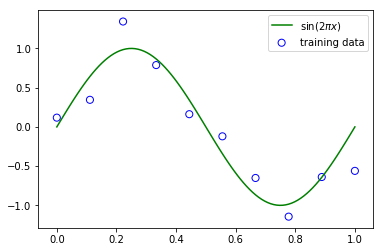

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

#散点图
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
#曲线
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
# 绘制label
plt.legend()
plt.show()

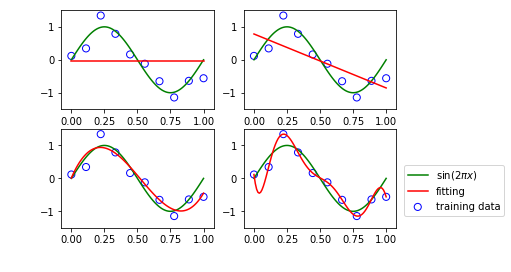

In [9]:
# enumerate 生成list数据的 (id, context) eg (0, 0) (1, 1) (2, 3) (3, 9)
for i, degree in enumerate([0, 1, 3, 9]):
    # plt.subplot(x, y, index)  绘制 x 行 y 列个子图, index 表示当前使用某个子图
    plt.subplot(2, 2, i + 1)
    # 构造PolynomialFeatures 类型对象 feature.
    # PolynomialFeatures 会对 (x1, x2, x3) 进行n次方处理.
    # 一维的曲线拟合 相当简单, 只需要先按照各样本 的 各阶次幂即可.
    feature = PolynomialFeatures(degree)
    X_train = feature.transform(x_train)
#    print("-----------")
 #   print(x_train)
  #  print(X_train)
    X_test = feature.transform(x_test)

    model = LinearRegressor()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

# 1.2 概率论
模式识别中的一个关键概念 是不确定性, 1 可以有测量误差影响 2 可以有数据集有限大小引起, 概率论提供了一个合理的框架, 用来对不确定性进行合理量化.   
概率论是模式识别中的一个中心基础.

**1 联合概率(joint probability)**    X 且 Y的概率
$$P(X,Y) = P(X)P(Y)$$  

**2 加和规则, 边缘概率**              X的概率, 通过 X且Y对Y所有情况累计的概率
$$ P(X) = \sum\limits_{y}P(X, Y) $$  

**3 条件概率**                       给定X的条件下,Y的概率
$$ P(Y|X) = \frac{P(X, Y)}{P(X)} $$  

**4 乘积规则**                       
$$ P(X, Y) = P(X|Y)P(Y) $$  

**5 贝叶斯公式(机器学习的核心)**
$$ P(Y, X) = P(X, Y) $$
$$ P(Y|X)P(X) = P(X|Y)P(Y) $$  
$$ P(Y|X) = \frac{P(X | Y)P(Y)}{P(X)} $$  

$$ P(X) = \sum\limits_{Y}P(X|Y)P(Y) $$

## 1.2.1 概率密度

如果一个变量x的落在区间$(x, x + \delta x)$的概率为$ p(x)\delta x $, 那么p(x)衡量了 x 的概率的密度, 叫做概率密度函数.

x 在区间(a, b) 上的概率为:  

$$ p(x \in (a, b)) = \int_{a}^{b} p(x) dx $$

$$ p(x) >= 0 $$  

$$ \int_{-\infty}^{\infty} p(x) dx = 1 $$  


概率密度函数的加和规则, 与乘积规则:  
$$ p(x) = \int p(x, y) dx $$  

$$ p(x, y) = p(y | x) p(x) $$ 

## 1.2.2 期望和协方差
概率论的一个重要的知识是: 期望和协方差

### 期望
在概率分布p(x)下, 函数f(x) 的平均值 成为 f(x)的期望.  --- $ E[f] $  

离散变量, 在概率函数情况下, 

$$ E[f] = \sum_xp(x)f(x) $$

连续变量,在概率密度情况下, 

$$ E[f] = \int p(x) f(x) dx $$

当只具有采样, 而不知道概率分布情况下, 期望可以通过求和平均方式估计:

$$ E[f] = \frac{1}{N} \sum\limits_{n=1}^{N} f(x) $$  
在 $ N \sim \infty $ 时, 这个平均作为期望的估计, 变得精准


联合变量函数, 对 x 分布的平均   

$$ E_x[f(x, y)] $$ 

条件分布的条件期望:  

$$ E_x[f|y] = \sum_x p(x|y) f(x) $$

### 方差协方差

方差描述 **变量偏离其期望的程度**, 定义为:   

$$ var[f] = E\Big[ \big( f(x) - E[f(x)] \big)^2 \Big] $$

==> :   

$$ var[f] = E\big[ f(x)^2 \big] - E\big[ f(x) \big]^2 $$

协方差描述, 多个随机变量共同变化,或者说相关性程度, 不相关协方差为0

两个随机变量的协方差为:  
$$ cov[x, y] = E_{x,y}\big[{x - E[x]} {y - E[y]}\big] = E_{x,y}[xy] - E[x]E[y] $$

两个随机向量 X Y的协方差 是一个协方差矩阵
$$ cov[X, Y] = E_{X,Y}\big[(X- E[X])(Y^T - E[Y^T])\big] = E_{X,Y}[XY^T] -E[X]E[Y^T] $$


## 1.2.3 贝叶斯概率
随机事件的频率考察概率 叫做经典概率, 而更加通用的观点是贝叶斯概率观点, 在贝叶斯概率观点中, 频率描述了不确定性的一个定量化描述.
在经典概率观点下, 认为概率是一个事件的出现频率, 而对于很多模式识别任务问题来说, 很多时候需要描述事件的不确定性, 这不能用频率来观测得到, 在贝叶斯描述下, 概率还被认为是一种描述事件不确定性的量化描述.  
  
考虑之前的多项式拟合的例子, 应用频率学派的观点, 考虑$t_n$随机变量的概率,是很合理的. 可以通过固定输入$x_n$,观测多次$t_n$的值的频率统计, 作为$t_n$的概率. 但是我们对于该问题, 实际上要考察的是$w$, 这可以被认为是一个随机变量,并且不可被观测统计频率, 我们将看到, 在贝叶斯概率框架下, 概率被扩展为可以描述这样随机变量的不确定性.  
  
在我们对数量(例如多项式参数$w$)进行推断时, 我们可以考虑使用贝叶斯后验概率定理. 在观察到数据之前, 我们有一些关于$w$的假设,这以先验概率p(w) 给出, 观测数据的不确定性可以由$p(D|w)$表示, 以后会描述如何被显示的表达出来. 贝叶斯定理的形式为:  
  
$$ p(w|D) = \frac{p(D|w) p(w)}{p(D)} \tag{1.43}$$
这样的贝叶斯后验概率框架, 使得我们可以使用观测数据D, 利用贝叶斯公式描述w的不确定性.  

$p(D|w)$ 可以用数据D来估计, 可以被看作是参数向量w的函数, 被成为似然函数. 似然函数,描述了在参数向量w下, 观测数据出现的可能性.似然函数是w的函数, 并不是w的分布.  

利用似然函数, 我们可以描述贝叶斯定理:  
$$ posterior \propto likelihood\  x \  prior \tag{1.44} $$  
  
**理解**  
**(1.43)中 所有的部分都可以看做是w的函数, *公式(1.43)的分母是一个归一化常数*, 确保公式左侧的后验概率分布是一个合理的概率, 积分为1.**  
**分母是一个归一化常数的解释**
**对 (1.43)的两侧关于w进行积分, 我们可以用后验概率分布和似然函数来表达贝叶斯定理的分母**: 
$$ p(D) = \int p(D|w) p(w) dw $$ 
如此, 明显是分子的归一化.
  
  
  
  
**原理**  
  
在贝叶斯观点和频率观点中, 似然函数p(D|w)都有重要意义,   
频率学观点中, 在拟合多项式参数时, 首先就认定w是一个固定的位置参数, 它的值可以有某种估计来确定, 这个估计的误差通过考察可能的数据集D的概率分布来得到.    
贝叶斯概率的观点来看, 认为只有数据D, 实际观测的数据, 而参数w是不确定的, 但是可以通过概率来描述其不确定性, 利用概率分布来描述w.    
频率学派广泛使用的一个估计就是 极大似然估计, 频率学家认为, 使似然函数p(D|w)达到最大的w的值, 对应于观察到的数据集出现概率最大化.  
贝叶斯观点的一个优点是, 对先验概率的引入是十分自然,也是必然的.

虽然贝叶斯的框架起源很早, 但是实际应用中, 因为求解贝叶斯公式, 具有积分的存在, 执行完整的贝叶斯步骤被限制.  
但是随着计算机的发展, 以及取样方法(例如 蒙特开罗采样方法)的引入, 打开了贝叶斯技术的大门.


## 1.2.4 高斯分布
第二章将会描述各种各样的概率分布 以及他们的性质, 这里先介绍一种最重要的概率分布 -- 高斯概率分布.  
  
$$ N(x| \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{\frac{1}{2}}} exp\Bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\Bigg\}  $$  
  
  
高斯分布, 由两个参数控制 $\mu \ \ \sigma $ 
期望为   
$$  E[x] = \int N(x|\mu, \sigma^2)x dx = \mu $$
方差为  
$$ var = E[x^2] - E[x]^2 = \sigma^2 $$ 

D维向量x 的高斯分布为:  
  
$$ N(x| \mu, \Sigma) = \frac{1}{(2\pi)^{\frac{D}{2}} \sigma^{\frac{1}{2}}} exp\Bigg\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\Bigg\}  $$  

$\mu$ 是 均值向量,  
$\Sigma$ 是 D x D 的协方差矩阵.
  
假设观测数据集 $ X={x_1, x_2 ... x_N}^T $,  首先假设独立同分布, 分布的参数是 $\mu \ \ \sigma^2 $ , 根据这些数据来确定这些参数.   
根据两个独立事件的联合概率 = 各个事件的边缘概率的乘积;  
数据集 X 是独立同分布的, 因此数据集被观测的概率为:   
  
$$ p(x | \mu, \sigma^2) = \prod\limits_{n=1}^N N(x_n | \mu, \sigma^2) $$
这就是观测数据以高斯分布的似然函数.  

使用数据集 来决定概率分布的参数, 的直观理解是, 在给定数据集合下, 参数的最大概率 -- $p(w|D)$
但是对于极大似然估计方法下, 我们估计的是设参数为变量, 数据集合的概率的最大化. $ \arg \max\limits_{\theta} p(D|w) $  
  
**极大似然估计 的局限性**
极大似然估计有一个根本的问题是, 对于 $\sigma_{ML}^2$的期望, 实际上是有偏估计, 多次采样, 每次得到一个 $\sigma_{ML}^2$ 对其取平均,  
$$ E[\sigma_{ML}^2] = \frac{N-1}{N} \sigma^2 $$
因此对于$\sigma$  的无偏估计为:  
$$ \sigma^2 = \frac{N}{N-1} \sigma_{ML}^2 = \frac{1}{N-1} \sum\limits_{n=1}^{N} (x_n - \mu_{ML})^2 $$  
  


## 1.2.5 重新考察曲线拟合问题
我们已经考察过 多项式曲线拟合 通过 误差最小化方法表达.   

**接下来我们从概率的观点来考察 多项式曲线拟合问题. 通过概率观点对误差函数和正则化有更深的认识, 并且引入完全贝叶斯处理方法.**   

**曲线拟合的目的是 对新加入的x, 有一个预测t. 我们对t预测的不确定性可以用概率分布来描述.**  
为了这个目的, 我们假设t的预测值y(x, w)为一个概率分布的均值, 而其不确定性由t预测的方差决定, 可以假设t服从高斯分布. 因此我们有:  
$$ p(t | x, w, \beta) = N(t | y(x, w), \beta^{-1}) $$
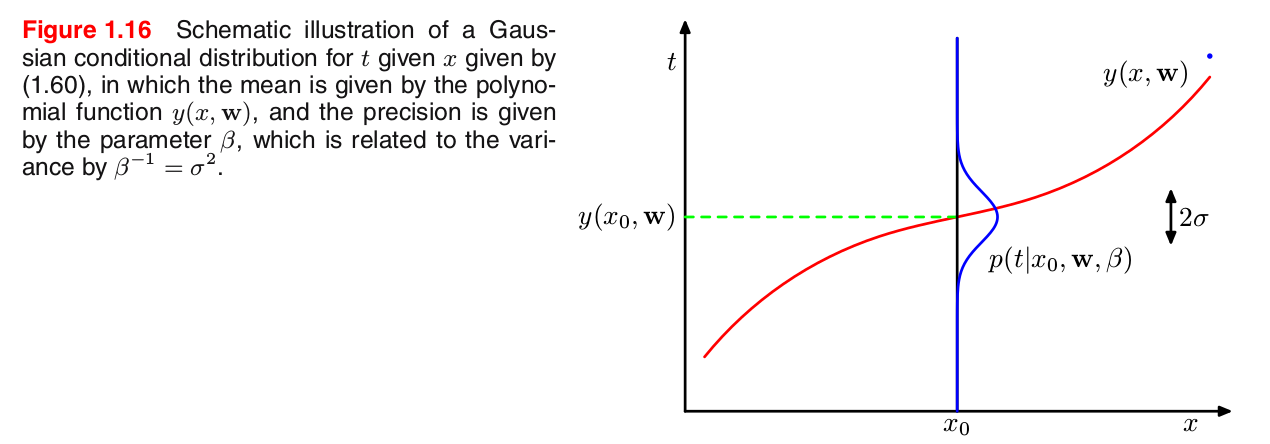

我们现在利用 训练数据集 X T **使用极大似然估计方法确定参数 w $\beta$**, 数据 独立同分布, 那么似然函数为:  
$$ p(T|X, w, \beta) = \int_{n=1}^{N} N(t_n | y(x, w), \beta^{-1}) $$
  
取对数, 对数似然函数, 分解为:   
$$ ln p(T | X, w, \beta) = -\frac{\beta}{2} \sum\limits_{n=1}^{N} \{ y(x_n, w) - t_n\}^2 + \frac{N}{2}ln\beta - \frac{N}{2}ln(2\pi) $$

通过对 w 求导为0, 得到 对数似然函数最大值, 求导时, 后面两项与w无关去掉, 最终需要对w求导的相关项是:  
$$ ln p(T | X, w, \beta) = -\frac{\beta}{2} \sum\limits_{n=1}^{N} \{ y(x_n, w) - t_n\}^2 $$
**其中 $-\frac{\beta}{2} $ 对与 ln p(T|X, w)的最大值无影响, 这正好是 平方和误差最小化函数. 因此我们常用的拟合方法--- 平方和误差函数 实际上是在高斯分布下的 极大似然估计方法的展开式.**  
  
然后对于 $\beta$, 求导=0, 得到
$$ \frac{1}{\beta_{ML}} = \frac{1}{N} \sum\limits_{n=1}^{N} \{ y(x_n, w_{ML}) - t_n \}^2 $$

现在, 我们确定了 $w_{ML} \beta_{ML} $, 现在我们得到的不仅是一个简单的值估计, 而且是t变量的 预测分布.
  
  
**现在, 我们对概率模型进一步向 bayes 方法靠近,  引入w的先验概率$p(w|\alpha)$,**     
$$ p(w|\alpha) = N(w | 0, \alpha I) = (\frac{\alpha}{2\pi})^\frac{M+1}{2} exp\Bigg\{ -\frac{\alpha}{2} w^Tw \Bigg\} $$  

$\alpha$是该分布的方差的逆(精准度),   
$M$     是多项式的阶.   
使用bayes 方法, 直接使用后验概率得到w的后验概率$p(w | X, T, \alpha, \beta) $  
$$ p(w | X, T, \alpha, \beta) \propto p(T|X, w, \beta) p(w | \alpha) \tag{1.66}$$  
  
**我们可以通过 使后验概率最大化, 直接找到w的期望, 这叫后验概率最大化(MAP)方法. (最基本的一种bayes方法).**   
通过取对数, 化简去掉与w无关的项:  
$$ \frac{\beta}{2} \sum\limits_{n=1}^{N} \{ y(x_n, w) - t_n\}^2 + \frac{\alpha}{2}w^Tw \tag{1.67}$$  
  
发现,实际上 正则化的平方和误差函数, 就是最大化后验概率的化简, 因此说 beyas方法 自动就选择合适的模型复杂度了.  
  
  


## 1.2.6 贝叶斯曲线拟合
虽然我们已经谈到了先验分布 $p(w | \alpha) $, 想着bayes 方法走进了一步, 但是这仍然在对w进行点估计, 并不完全是bayes观点.  
**在一个纯粹的bayes方法中, 我们应该始终使用 概率的两个规则 -- 加和规则 与 乘积规则. 稍后会看到 这需要对参数进行积分. 对模式识别来说 这是bayes方法的核心.**   
曲线拟合问题中, 我们的目的是 利用已知数据 X T, 在新来测试点x, 得到t的值. 因此我们希望估计 $ p(t | x, X, T) $. 这里我们假设参数 $\alpha, \beta $ 是固定的.  
bayes方法 自始终都使用 概率加和与乘积规则, 预测概率可以写成如下形式:  
$$ p(t | x, X, T) = \int p(t | x, w) p(w | x, t) dw \tag{1.68}$$  
$p(t| x, w)$ 由公式 (1.60)给出 是个以$y(x, w, \beta^{-1}) $ 为均值的高斯分布, 简化了记号, $\alpha, \beta$  
$p(w | X, T)$ 是参数的后验概率分布, 通过对式(1.66)归一化得到.  
最终(1.68)的积分可以计算 可以解析解的方式求出t. 因此 预测分布由高斯的形式给出:  
$$ p(t | x, X, T) = N(t | m(x), s^2(x)) \tag{1.69}$$   



# 1.3 模型选择  
在使用最小平方和方法拟合多项式曲线例子中, 存在一个最优的多项式阶数, 能够给出最好结果.  多项式的阶数控制了模型的参数个数, 因此控制这模型的复杂度.  
通过使用正则化方法, 可以通过正则化参数$\lambda$控制模型的复杂度. 在实际项目中, 更复杂的模型也会有多个这样的控制参数, 我们需要确定这样的参数的值, 来得到一个合理的模型复杂度, 在新数据上有一个更好的预测.  除此之外 我们还希望找到一个合适的可选的模型范围,以便能够找到对于特定应用的最好的模型.  
## 交叉验证方法  

## 完整bayes方法, 复杂度的惩罚项是自然得到的.

# 1.5 决策论 
## 1.5.4 推断和决策
我们已经将分类问题划分为两个部分:  推断阶段和决策阶段. 
**推断阶段我们使用 $ p(C_k | x)$ 的模型.**   
**决策阶段我们使用这些后验概率模型进行最优的分类.**   
**另一种方法是同时解决这两个问题, 直接得到一个将x直接映射为决策的函数, 这样的函数成为 判别函数.**  
实际上我们区分出三种不同的方法来 解决决策问题. 安复杂度下降排序为:   
+ (a) 首先对于每个类别$C_k$, 独立的确定条件密度分布 $p(x|C_k)$, 这是一个推断问题, 然后推断先验分布 $p(C_k)$.然后使用bayes定理得到      
    $$ p(C_k|x) = \frac{p(x|C_k) p(C_k)}{p(x)} \tag{1.82}$$ 
    求解得到后验概率 $p(C_k|x)$, 分母的p(x), 可以用分子中的项表示
    $$ p(x) = \sum\limits_{k}p(x|C_k)p(C_k) \tag{1.83}$$ 
    等价的我们可以直接对 联合概率进行建模 $ p(x, C_k)$, 然后归一化得到后验概率 $p(C_k|x)$.   
    然后我们就可以通过 决策论, 来确定每个新输入x的类别.  
    **显式或者隐式的对 输入以及输出 建模的方法 成为 生成模型.  因为可以通过采样, 可以利用生成模型函数, 直接人工合成输入空间数据.** (判别模型, 生成模型, 之间的区别可能是生成模型是对输入输出的建模, 而判别模型只是对 输入输出关系的建模)
    
    